<h1>News by Categories (Pictogram)</h1>
<h4>Author: Chang Dakota Sum Kiu</h4>
<h4>Last Modified: 07/12/2021</h4>


---


This notebook contains the code used to create a waffle chart of news by categories. Data taken from [Kaggle](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle

### Converting the data to a pandas table and exploration

In [2]:
news = pd.read_json('/Users/dcoder/Desktop/school/csc630/News_Category_Dataset_v2.json', lines=True)

In [3]:
news.sample(8)

,category,headline,authors,link,short_description,date
150141,WELLNESS,No One Tells Us We Can't Have the Dessert From...,"Mark Miller, Contributor\nJournalist, Humorist...",https://www.huffingtonpost.com/entry/unhealthy...,EACH SERVING CONTAINS Even the queen of high c...,2013-07-23
144417,TRAVEL,"Your Weekly Travel Zen: Sedona, Arizona",,https://www.huffingtonpost.com/entry/sedona-ar...,"On a recent trip to Northern Arizona, I was st...",2013-09-22
46991,POLITICS,"After A Very Bad Year, Americans Like The Supr...",Cristian Farias,https://www.huffingtonpost.com/entry/supreme-c...,A bit of good news while the court limps along...,2016-09-26
25933,POLITICS,Socialism Is So Hot Right Now. Thank Bernie Sa...,Eliot Nelson,https://www.huffingtonpost.com/entry/democrati...,You may not have heard of the Democratic Socia...,2017-05-22
60205,TECH,"Facebook Smashes Expectations, Stocks Skyrocket",,https://www.huffingtonpost.com/entry/facebook-...,"Facebook also announced a stock split, similar...",2016-04-28
13846,HEALTHY LIVING,Mothers’ Exposure To Air Pollution Tied To Cel...,"Lisa Rapaport, Reuters",https://www.huffingtonpost.com/entry/mothers-e...,"As much as possible, people should avoid breat...",2017-10-18
36354,PARENTS,Subscription Services Provide Book And Toy Opt...,Emily McCombs,https://www.huffingtonpost.com/entry/subscript...,"""We hope to teach children that they are pheno...",2017-01-24
98491,BLACK VOICES,Why St. Louis Should Move To Illinois,,https://www.huffingtonpost.com/entry/st-louis-...,,2015-02-17


In [4]:
news['category'].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

In [5]:
cat_count = []
for cat in news['category'].unique():
    cat_count.append(news[news['category']==cat].count()[0])
cat_count   

[3405,
 16058,
 2177,
 3459,
 32739,
 2670,
 4528,
 3490,
 5175,
 6314,
 4884,
 5937,
 9887,
 2815,
 2082,
 2556,
 2178,
 1129,
 1004,
 1144,
 3955,
 1339,
 2254,
 2622,
 2096,
 6694,
 3664,
 1398,
 2579,
 1401,
 1509,
 17827,
 8677,
 4195,
 9649,
 3426,
 3651,
 6226,
 1707,
 1323,
 1030]

### Creation of a dataframe based on lists made above

In [6]:
data ={'categories': news['category'].unique().tolist(),
       'count': cat_count
     }
  
df = pd.DataFrame(data)

In [7]:
df

,categories,count
0,CRIME,3405
1,ENTERTAINMENT,16058
2,WORLD NEWS,2177
3,IMPACT,3459
4,POLITICS,32739
5,WEIRD NEWS,2670
6,BLACK VOICES,4528
7,WOMEN,3490
8,COMEDY,5175
9,QUEER VOICES,6314


In [16]:
new_df = df.sort_values(by=['count'])

In [17]:
new_df['count'] = new_df['count'].apply(lambda x: int(x/1000))

In [18]:
new_df = new_df[-5:]

In [19]:
new_df

,categories,count
34,STYLE & BEAUTY,9
12,TRAVEL,9
1,ENTERTAINMENT,16
31,WELLNESS,17
4,POLITICS,32


### Creating a waffle chart using pywaffle

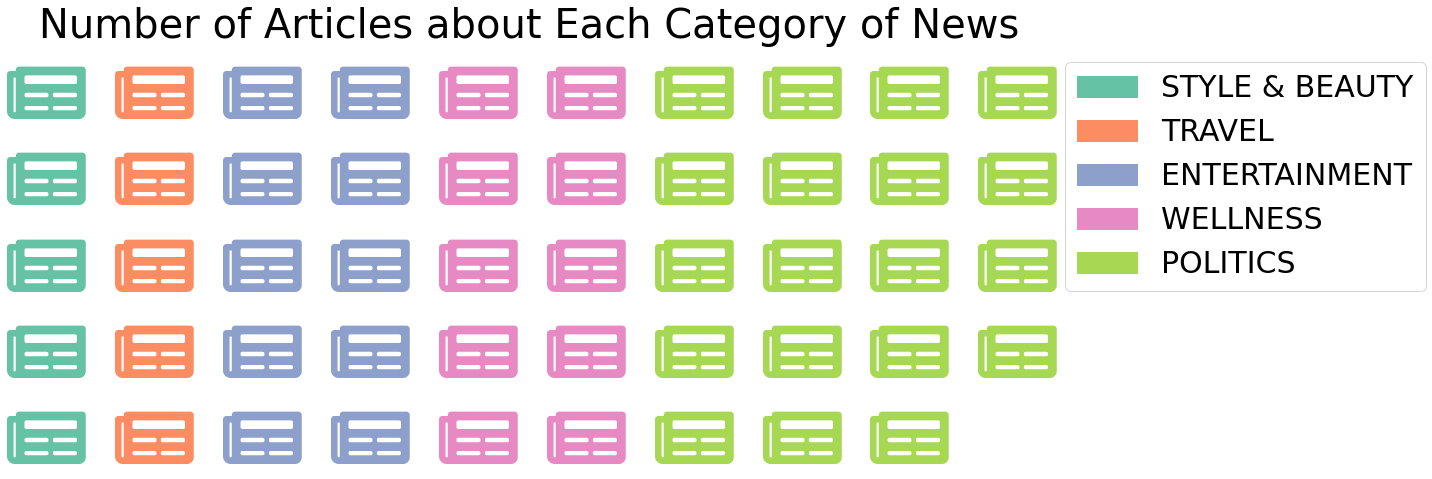

In [31]:
count = new_df['count']
labels = new_df['categories']
fig = plt.figure(
    FigureClass=Waffle, 
    title={
        'label': 'Number of Articles about Each Category of News',
        'loc': 'center',
        'fontdict': {
            'fontsize': 40
        }
    },
    rows=5, 
    columns=10, 
    values=count,
    labels=list(labels),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize': 30},
    figsize=(20, 10),
    interval_ratio_x = 0.5,
    interval_ratio_y = 0.2,
    icons='newspaper',
    icon_size = 70,
    block_arranging_style='snake'
)
plt.show()